# <center> MA5851 Assessment 3 Part 3: 
##    <center> Natural Language Processing <center> 
#### <center> __James Watts__<center> 
#### <center> James Cook University <center> 
#### <center> April 2021 <center> 
*** 
*** 

### <center>High level Literature Review<center>
A high level review of the literature regarding betting on NBA poses markets may not only be inefficient in pricing when compared to the estimated true probabilities. This is taken further in an article by Paul Rodney who possets that bookmakers maximise profitability by setting prices that are reflective of consumer sentiment (Weinbach, 2008). Several other inefficiencies in betting markets have been highlighted such as zig-zag effect. (Gray, 2018). However identifying an inefficiency after the fact and being able to exploited one in real time us a different kettle of fish as prices and market behaviours are not a fixed entity and bookmakers and punters alike constantly evolve their strategies and sophistication in pricing markets to quote Yogi Berra “It's tough to make predictions, especially about the future.”(William Compton, 2012).


### <center>NLP Model step by step<center>
#### Step 1: Set module library for assessments
The library of python modules was set up as below. For consistency and to limit potential coding errors the list was kept identical for part 2 and 3 irrespective of which modules were called so that it can be run cleanly as a single prototype or seperatly.

In [563]:
#Module list
import os
import pandas as pd
import numpy as np
from random import shuffle
from statistics import mean
import string
import time
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup
import re
import scrapy
import urllib.request
from urllib.parse import quote 
from itertools import chain
import praw 

import pyspark.sql.functions as f

import spacy
nlp = spacy.load("en_core_web_sm")

from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split

import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
nltk.download(['names','stopwords','averaged_perceptron_tagger','vader_lexicon','punkt'])
stemmer = SnowballStemmer("english")

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.models import CoherenceModel

#Set working directory for project
os.chdir('C:\\Users\\jmjou\\Documents\\DataScience\\MA5851 Data Science Master Class 1\\Assesment 3')
os.getcwd()

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\jmjou\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jmjou\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jmjou\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jmjou\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jmjou\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'C:\\Users\\jmjou\\Documents\\DataScience\\MA5851 Data Science Master Class 1\\Assesment 3'

#### Step 2: Upload datasets
Directory was aligned to part 2 and the saved datasets from Part 2 were uploaded to the module using read_csv and checked by displaying to the module.

In [52]:
# IMPORT SAVE FILES #complete_scrape = pd.read_csv(r'C:\Users\jmjou\Documents\DataScience\MA5851 Data Science Master Class 1\Assesment 3\playerlist_compete_downloads.csv')
os.chdir('C:\\Users\\jmjou\\Documents\\DataScience\\MA5851 Data Science Master Class 1\\Assesment 3')
player_list = pd.read_csv("current_player_list.csv") # backup list of players
forum_pages = pd.read_csv("backup_webcrawl_output.csv") 
comments_df = pd.read_csv("player_post_comments.csv")  
player_collated_comments = pd.read_csv("collated_comments.csv") 

#check data
display(player_list.head())
print(len(player_list))
display(forum_pages.head())
print(len(forum_pages))
display(comments_df.head())
print(len(comments_df))
display(player_collated_comments.head())
print(len(player_collated_comments))

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,...,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP,player_lower
0,337,254,Nikola Jokić,C,25,DEN,56,1972,31.3,0.644,...,9.8,2.7,12.5,0.305,NaN,9.3,2.6,11.9,6.9,nikola-jokić
1,149,113,Stephen Curry,PG,32,GSW,49,1664,26.7,0.663,...,5.5,1.8,7.2,0.209,NaN,8.2,0.1,8.3,4.4,stephen-curry
2,169,126,Luka Dončić,PG,21,DAL,50,1754,25.8,0.593,...,4.2,2.0,6.3,0.171,NaN,6.5,0.8,7.4,4.2,luka-dončić
3,17,12,Giannis Antetokounmpo,PF,26,MIL,47,1583,28.9,0.630,...,5.2,2.7,7.9,0.240,NaN,6.0,2.6,8.6,4.2,giannis-antetokounmpo
4,647,488,Nikola Vučević,C,30,TOT,57,1917,23.9,0.571,...,3.4,2.5,5.9,0.147,NaN,5.6,0.3,5.8,3.8,nikola-vučević


672


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Index,Player,URL,comments
0,0,0,0,0,kyle-lowry,https://edge-forums.nbcsports.com/topic/831774...,"[""What's the word on everyone's favourite/hate..."
1,1,1,1,1,kyle-lowry,https://edge-forums.nbcsports.com/topic/831774...,"['With the previous big men moving, will he pe..."
2,2,2,2,2,kyle-lowry,https://edge-forums.nbcsports.com/topic/831774...,"['LOLLLLLLL', '', 'True I am a newbie to Baske..."
3,3,3,3,3,kyle-lowry,https://edge-forums.nbcsports.com/topic/831774...,['Just traded for him. Looking forward to anot...
4,4,4,4,4,kyle-lowry,https://edge-forums.nbcsports.com/topic/831774...,"[""Won't return"", 'https://www.twitter.com/Rapt..."


9193


,Unnamed: 0,Player,comments
0,0,kyle-lowry,"[""What's the word on everyone's favourite/hate..."
1,1,kyle-lowry,"['With the previous big men moving, will he pe..."
2,2,kyle-lowry,"['LOLLLLLLL', '', 'True I am a newbie to Baske..."
3,3,kyle-lowry,['Just traded for him. Looking forward to anot...
4,4,kyle-lowry,"[""Won't return"", 'https://www.twitter.com/Rapt..."


6159


,Unnamed: 0,Player,comments
0,0,kyle-lowry,"[""What's the word on everyone's favourite/hate..."
1,7,bradley-beal,['Just noticed in the 2019-2020 thread a lot o...
2,14,julius-randle,"[""Can't believe there's no thread for my Week ..."
3,18,donovan-mitchell,"['Just signed a max extension, he\xa0celebrate..."
4,23,shai-gilgeous-alexander,"['So, with the Rubio trade, is he rocketing up..."


375


#### Step 3: VORP Metadata
The player stat VORP is used as a proxy of relative player value, as shown in the graph below the distribution has a positive skewness were a handful of players are notably better than the mass who are relatively interchangeable at a value over replacement level. VORP value was normalised using a minmax_scale as to set a comparison framework for the sentiment analysis which is to measure the public enthusiasm for each player.

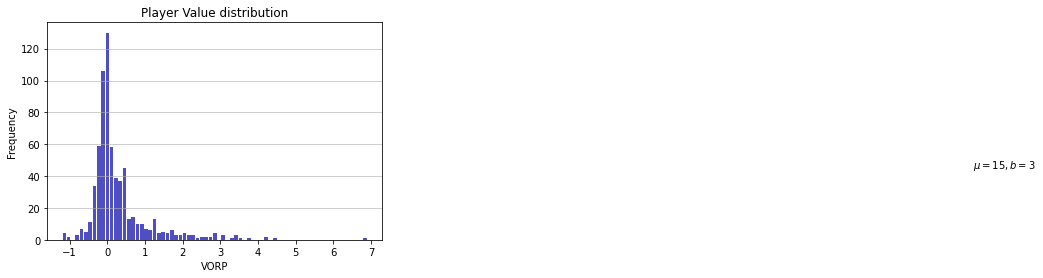

In [454]:
#Create historgram of VORP distribution
vorp_ratings = list(player_list["VORP"])            #subset VORP ratings

n, bins, patches = plt.hist(x=vorp_ratings,         # Set histogram metrics
                            bins='auto',
                            color='#0504aa',
                            alpha=0.7,
                            rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('VORP')                                 # set lable and axis text
plt.ylabel('Frequency')
plt.title('Player Value distribution')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()

In [53]:
player_list['VORP_norm'] = minmax_scale(player_list[['VORP']]) # Convert VORP to a scaler value for comparison to sentiment
player_list

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,...,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP,player_lower,VORP_norm
0,337,254,Nikola Jokić,C,25,DEN,56,1972,31.3,0.644,...,2.7,12.5,0.305,NaN,9.3,2.6,11.9,6.9,nikola-jokić,1.000000
1,149,113,Stephen Curry,PG,32,GSW,49,1664,26.7,0.663,...,1.8,7.2,0.209,NaN,8.2,0.1,8.3,4.4,stephen-curry,0.691358
2,169,126,Luka Dončić,PG,21,DAL,50,1754,25.8,0.593,...,2.0,6.3,0.171,NaN,6.5,0.8,7.4,4.2,luka-dončić,0.666667
3,17,12,Giannis Antetokounmpo,PF,26,MIL,47,1583,28.9,0.630,...,2.7,7.9,0.240,NaN,6.0,2.6,8.6,4.2,giannis-antetokounmpo,0.666667
4,647,488,Nikola Vučević,C,30,TOT,57,1917,23.9,0.571,...,2.5,5.9,0.147,NaN,5.6,0.3,5.8,3.8,nikola-vučević,0.617284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,579,439,Landry Shamet,SG,23,BRK,45,935,10.5,0.582,...,0.4,1.2,0.061,NaN,-1.0,-1.5,-2.5,-0.1,landry-shamet,0.135802
668,360,267,Nathan Knight,PF,23,ATL,25,211,12.4,0.494,...,0.2,0.2,0.039,NaN,-3.1,-1.6,-4.7,-0.1,nathan-knight,0.135802
669,367,272,Rodions Kurucs,SF-PF,22,TOT,20,121,6.7,0.441,...,0.2,-0.1,-0.040,NaN,-6.6,2.5,-4.1,-0.1,rodions-kurucs,0.135802
670,369,272,Rodions Kurucs,SF,22,HOU,11,75,0.9,0.297,...,0.1,-0.3,-0.172,NaN,-10.4,2.1,-8.3,-0.1,rodions-kurucs,0.135802


In [54]:
comments_df # Check comment list that will comprise the corupus for the Sentiment Analysis.

,Unnamed: 0,Player,comments
0,0,kyle-lowry,"[""What's the word on everyone's favourite/hate..."
1,1,kyle-lowry,"['With the previous big men moving, will he pe..."
2,2,kyle-lowry,"['LOLLLLLLL', '', 'True I am a newbie to Baske..."
3,3,kyle-lowry,['Just traded for him. Looking forward to anot...
4,4,kyle-lowry,"[""Won't return"", 'https://www.twitter.com/Rapt..."
...,...,...,...
6154,9184,lou-williams,"['Nobody knows except Dr. Drew ', 'Nobody know..."
6155,9185,lou-williams,['Teague is finna eat!']
6156,9187,james-johnson,"[""Okay, so he's apparently starting for the Ki..."
6157,9189,garrett-temple,['Garrett Temple scored 13 points on 6-of-8 sh...


***
#### <center> NLP 1:  <center>
***
#### Step 4: Sentiment Analysis Score
The first NLP task conducted was a sentiment analysis for each page of comments in the corpus, to achieve this the text was further processed before analysis was conducted with results set aside. VADER (acronym of “Valence Aware Dictionary and sEntiment Reasoner”) was used to perform sentiment analysis using the SentimentIntensityAnalyzer module. VADER was chosen as the best choice for a proof of concept in a prototype model as VADER is a quick plug and play package coming with an existing lexicon of word sentiment developed under Amazon’s mechanical Turk. This prebuilt sentiment list can be run on the text corpus without any supervised pre training on the dataset. In a production version a thorough vetting of the sentiment lexicon would need to be conducted to include domain specific terms to betting and basketball. 

Sentiment score code was created as below, the function clean_text_token was built to pre-process the text data of the comments. The function removed HTML tags, punctuation, numbers and converted text to lowercase then scanned the text for stop words and removed them. This function was run over the text corpus and set into a new column words for sentiment analysis. Word frequency was found with word_tokenize and SentimentIntensityAnalyzer was used on the clean text, this sentiment list was split out into new colums pos_comment, negs_comment and compound_comment for further analysis.



In [455]:
stopwords = set(nltk.corpus.stopwords.words('english'))
def clean_text_token(input_text):
    if pd.isnull(input_text) == True:
        return ""
    else:
             
        new_text = re.sub(r'<.*?>_', '',input_text)                             # remove HTML tags
        new_text = re.sub(r'[^\w\s]', '', new_text)                             # remove punc.
        new_text = re.sub(r'\d+','',new_text)                                   # remove numbers
        new_text = new_text.lower()                                             # make lower case
        new_text = word_tokenize(new_text)
        new_text = [w for w in new_text if not w in stopwords]
        new_text = (" ").join(new_text)
        return new_text

sia = SentimentIntensityAnalyzer()

pp_comment = comments_df # set into new dataframe
pp_comment['words'] = ''
pp_comment['words'] = pp_comment.apply(lambda row: clean_text_token(row['comments']), axis=1 ) 

# Run over DF - calculate word freq and VADER Score
pp_comment['freq'] = pp_comment.apply(lambda row: nltk.FreqDist(nltk.word_tokenize(str(row['words']))), axis=1 )
pp_comment['sentiment'] = pp_comment.apply(lambda row: sia.polarity_scores(str(row['words'])), axis=1 )
pp_comment['pos_comment'] = pp_comment.apply(lambda row: row['sentiment']['pos'], axis=1 )
pp_comment['negs_comment'] = pp_comment.apply(lambda row: row['sentiment']['neg'], axis=1 )
pp_comment['compound_comment'] = pp_comment.apply(lambda row: row['sentiment']['compound'], axis=1 )
pp_comment

,Unnamed: 0,Player,comments,words,freq,sentiment,pos_comment,negs_comment,compound_comment,pos_diff,neg_diff,ls
0,0,kyle-lowry,"[""What's the word on everyone's favourite/hate...",whats word everyones favouritehated angry litt...,"{'whats': 5, 'word': 5, 'everyones': 5, 'favou...","{'neg': 0.08, 'neu': 0.687, 'pos': 0.233, 'com...",0.233,0.080,0.9999,0.019925,-0.038797,"[what, word, everyon, favouriteh, angri, littl..."
1,1,kyle-lowry,"['With the previous big men moving, will he pe...",previous big men moving perform better year pr...,"{'previous': 3, 'big': 5, 'men': 3, 'moving': ...","{'neg': 0.103, 'neu': 0.714, 'pos': 0.183, 'co...",0.183,0.103,0.9854,-0.030075,-0.015797,"[previous, move, perform, better, year, previo..."
2,2,kyle-lowry,"['LOLLLLLLL', '', 'True I am a newbie to Baske...",lolllllll true newbie basketball talk rotoworl...,"{'lolllllll': 2, 'true': 2, 'newbie': 2, 'bask...","{'neg': 0.101, 'neu': 0.694, 'pos': 0.205, 'co...",0.205,0.101,0.9941,-0.008075,-0.017797,"[lolllllll, true, newbi, basketbal, talk, roto..."
3,3,kyle-lowry,['Just traded for him. Looking forward to anot...,traded looking forward another seasonxaof stea...,"{'traded': 2, 'looking': 1, 'forward': 3, 'ano...","{'neg': 0.094, 'neu': 0.707, 'pos': 0.199, 'co...",0.199,0.094,0.9954,-0.014075,-0.024797,"[trade, look, forward, anoth, seasonxaof, stea..."
4,4,kyle-lowry,"[""Won't return"", 'https://www.twitter.com/Rapt...",wont return httpswwwtwittercomraptorsstatus lo...,"{'wont': 2, 'return': 1, 'httpswwwtwittercomra...","{'neg': 0.138, 'neu': 0.604, 'pos': 0.258, 'co...",0.258,0.138,0.9907,0.044925,0.019203,"[wont, return, look, look, nope, twist, ankl, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
6154,9184,lou-williams,"['Nobody knows except Dr. Drew ', 'Nobody know...",nobody knows except dr drew nobody knows excep...,"{'nobody': 4, 'knows': 4, 'except': 4, 'dr': 4...","{'neg': 0.163, 'neu': 0.678, 'pos': 0.16, 'com...",0.160,0.163,-0.6686,-0.053075,0.044203,"[nobodi, know, except, draw, nobodi, know, exc..."
6155,9185,lou-williams,['Teague is finna eat!'],teague finna eat,"{'teague': 1, 'finna': 1, 'eat': 1}","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0000,-0.213075,-0.118797,"[teagu, finna]"
6156,9187,james-johnson,"[""Okay, so he's apparently starting for the Ki...",okay hes apparently starting kings salmons mil...,"{'okay': 1, 'hes': 10, 'apparently': 1, 'start...","{'neg': 0.104, 'neu': 0.682, 'pos': 0.214, 'co...",0.214,0.104,0.9983,0.000925,-0.014797,"[okay, appar, start, king, salmon, mile, away,..."
6157,9189,garrett-temple,['Garrett Temple scored 13 points on 6-of-8 sh...,garrett temple scored points shooting includin...,"{'garrett': 2, 'temple': 4, 'scored': 1, 'poin...","{'neg': 0.079, 'neu': 0.736, 'pos': 0.185, 'co...",0.185,0.079,0.6966,-0.028075,-0.039797,"[garrett, templ, score, point, shoot, includ, ..."


In [57]:
pp_comment.to_csv("backup_comment_sentiment.csv")  #Backup sentiment analysis

#### Step 5: NLP 1: Sentiment Analysis combined score
To compare the scores of comments against to collection of comments associated with a particular player the sentiment scores for each player was averaged using the groupby() function and held to pass back to player dataframe. 
    
Next the text corpus that collated all text by player was called and the above process was rerun to conduct sentiment analysis at a player aggregated comments level so that differences between single discussions and the text corpus can be determined. 
    
The scores for the corpus as a player whole and the average player comment averages were both passed back into a player dataframe for review.



In [58]:
comment_avg = pp_comment.groupby('Player')['pos_comment','negs_comment','compound_comment'].mean()
# Join mean tweet score onto player list


<ipython-input-58-022068bd413f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  comment_avg = pp_comment.groupby('Player')['pos_comment','negs_comment','compound_comment'].mean()


In [59]:
# Average tweet sentiment by player 
# player_list  # List of players from BBR
# player_collated_comments # Tweets compined for one player as single courpus

pp_colated = player_collated_comments           # Set player comments into new DF
pp_colated['words'] = pp_colated.apply(lambda row: clean_text_token(row['comments']), axis=1 ) 

# Run over DF - calculate word freq and VADER Score
pp_colated['sentiment'] = pp_colated.apply(lambda row: sia.polarity_scores(str(row['words'])), axis=1 )
pp_colated['pos_collate'] = pp_colated.apply(lambda row: row['sentiment']['pos'], axis=1 )
pp_colated['neg_collate'] = pp_colated.apply(lambda row: row['sentiment']['neg'], axis=1 )
pp_colated['compound_collate'] = pp_colated.apply(lambda row: row['sentiment']['compound'], axis=1 )



In [456]:
# Merge results of average per player and collated text results into a single dataframe
player_stat_n_sentiment = player_list.merge(pp_colated, left_on='player_lower', right_on='Player', how='inner')
player_stat_n_sentiment = player_stat_n_sentiment.merge(comment_avg, left_on='player_lower', right_on='Player', how ='left')
player_stat_n_sentiment = player_stat_n_sentiment.drop_duplicates(subset='Player_x')
player_SnS = player_stat_n_sentiment.loc[:, lambda df: ['Player_x', 'Pos','Age', 'Tm', 'G','VORP', 'VORP_norm','pos_comment','pos_collate','neg_collate','negs_comment','compound_collate', 'compound_comment']]
print('Sentiment analysis was conducted on',len(player_stat_n_sentiment), 'players')
player_SnS

Sentiment analysis was conducted on 366 players


,Player_x,Pos,Age,Tm,G,VORP,VORP_norm,pos_comment,pos_collate,neg_collate,negs_comment,compound_collate,compound_comment
0,Stephen Curry,PG,32,GSW,49,4.4,0.691358,0.205044,0.203,0.120,0.124422,1.0000,0.652393
1,Giannis Antetokounmpo,PF,26,MIL,47,4.2,0.666667,0.204895,0.208,0.103,0.120342,1.0000,0.642508
2,Kawhi Leonard,SF,29,LAC,45,3.5,0.580247,0.219778,0.215,0.105,0.106689,1.0000,0.971949
3,LeBron James,PG,36,LAL,41,3.4,0.567901,0.207773,0.227,0.101,0.122091,1.0000,0.790430
4,Damian Lillard,PG,30,POR,52,3.4,0.567901,0.218244,0.226,0.100,0.113439,1.0000,0.812773
...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,Frank Jackson,PG,22,DET,28,-0.1,0.135802,0.238000,0.238,0.064,0.064000,0.9260,0.926000
472,Isaiah Joe,SG,21,PHI,29,-0.1,0.135802,0.266000,0.266,0.105,0.105000,0.6597,0.659700
473,Stanley Johnson,PF,24,TOR,49,-0.1,0.135802,0.233273,0.242,0.087,0.102000,1.0000,0.931273
474,Landry Shamet,SG,23,BRK,45,-0.1,0.135802,0.231667,0.215,0.089,0.073000,0.9994,0.995733


 #### Step 6: Visual analysis of Sentiment score and VORP strength
A high level visual analysis of the results was conducted on the VARER sentiment results.
Firstly a scatter of the average compound sentiment against the normalised VORP was done, this shows that the compound scores for comments are overwhelmingly net positive. 

From this, another scatter was produced switching compund scrore for the strength of the positive comments. This chart clearly shows that there is not a correlation between sentiment and player value, and the most extreme player sentiments are towards players that have median on-court value.


Text(0.5, 1.0, 'Combined Player Sentiment score and VORP strength')

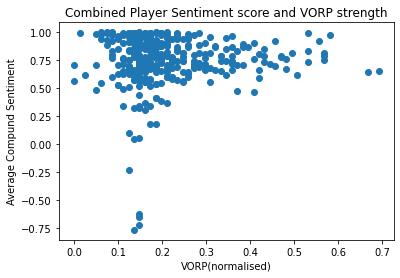

In [443]:
vorp_scat = player_SnS.loc[:, lambda df: ['VORP_norm','compound_comment']]

plt.scatter(x= vorp_scat['VORP_norm'], y = vorp_scat['compound_comment'])
plt.xlabel('VORP(normalised)')
plt.ylabel('Average Compund Sentiment')
plt.title('Player Sentiment (compound) score and VORP strength')                             

Text(0.5, 1.0, 'Player Sentiment (positive) score and VORP strength')

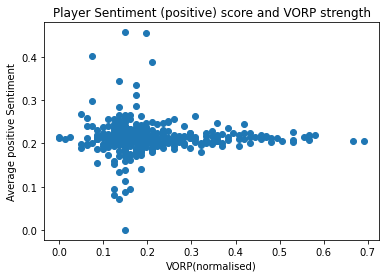

In [445]:
vorp_scat = player_SnS.loc[:, lambda df: ['VORP_norm','pos_comment']]

plt.scatter(x= vorp_scat['VORP_norm'], y = vorp_scat['pos_comment'])
plt.xlabel('VORP(normalised)')
plt.ylabel('Average positive Sentiment')
plt.title('Player Sentiment (positive) score and VORP strength')   

#### Step 7: Visual analysis of Sentiment scores
Next visual analysis was comparing the average comment sentiment against the sentiment of the entire text related to a player for Positive, Negative and compound values. 
Further we observe that the positive and negative scores for a player are clearly correlated and analysing a section of player comments would generally be a proxy to the player sentiment as a whole. However the compound score appears to have an issue when all the text are collated at a player level as the majority of the combined text compound score is 1. For this reason, the compound score was dropped and positive player positive comments will be used as the measure to highlight players to focus attention on.


In [446]:
comment_plt = player_SnS.loc[:, lambda df: ['VORP_norm','pos_comment', 'pos_collate', 'neg_collate', 'negs_comment', 'compound_collate', 'compound_comment']]

Text(0.5, 1.0, 'Average comment sentiment vs Player Corpus Sentiment')

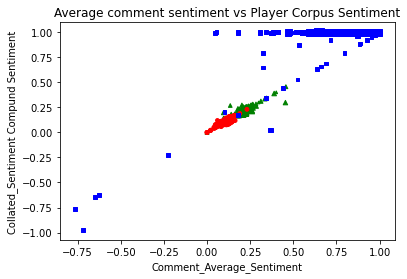

In [366]:
comment_plt = player_SnS.loc[:, lambda df: ['VORP_norm','pos_comment', 'pos_collate', 'neg_collate', 'negs_comment', 'compound_collate', 'compound_comment']]

plt.scatter(x= comment_plt['pos_comment'], y = comment_plt['pos_collate'], c='green', marker = '^', s=comment_plt['VORP_norm']*100)
plt.scatter(x= comment_plt['negs_comment'], y = comment_plt['neg_collate'], c='red', marker = 'o', s=comment_plt['VORP_norm']*100)
plt.scatter(x= comment_plt['compound_comment'], y = comment_plt['compound_collate'], c='blue', marker = 's', s=comment_plt['VORP_norm']*100)
plt.xlabel('Comment_Average_Sentiment')
plt.ylabel('Collated_Sentiment Compund Sentiment')
plt.title('Average comment sentiment vs Player Corpus Sentiment')       

Correlation between average sentiment and the corups sentiment is strong - will us this measure as the test and traing metric for sentiment. - Positivity of the comment will be used.

Text(0.5, 1.0, 'Average comment sentiment vs Player Corpus Sentiment')

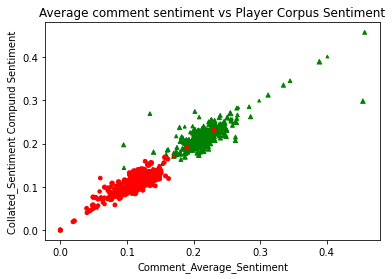

In [365]:
comment_plt = player_SnS.loc[:, lambda df: ['VORP_norm','pos_comment', 'pos_collate', 'neg_collate', 'negs_comment', 'compound_collate', 'compound_comment']]

plt.scatter(x= comment_plt['pos_comment'], y = comment_plt['pos_collate'], c='green', marker = '^', s=comment_plt['VORP_norm']*100)
plt.scatter(x= comment_plt['negs_comment'], y = comment_plt['neg_collate'], c='red', marker = 'o', s=comment_plt['VORP_norm']*100)
plt.xlabel('Comment_Average_Sentiment')
plt.ylabel('Collated_Sentiment Compund Sentiment')
plt.title('Average comment sentiment vs Player Corpus Sentiment') 

#### Step 8: Players to focus on 
Next the model generates a list of players of interest, in a production model this will be take further as more granular stats would be pulled into a pricing model and bookmaker odds scraped to look for value opportunities.
    
Generating the list is done as follows, average scores for positive and negative were calculated using .mean(), the delta of each comment and the mean value was calculated for positive and negative, respectively.  Players with the highest average delta were subset into lists of the 10 hottest and coldest players


In [70]:
avg_pos = pp_comment['pos_comment'].mean()
avg_neg = pp_comment['negs_comment'].mean()
print('Average poitivity of a player comment is',round(avg_pos,2),'and average value of negitivity is', round(avg_neg,2))

Average poitivity of a player comment is 0.21 and average value of negitivity is 0.12


In [457]:
#Players to review - want to know which players have been hot or not to adjust accordingly then pull up recent history 

# calculate delta of comment to mean
pp_comment['pos_diff'] = pp_comment.apply(lambda row: row['pos_comment']-avg_pos, axis=1 ) 
pp_comment['neg_diff'] = pp_comment.apply(lambda row: row['negs_comment']-avg_neg, axis=1 )

# avaerage delta at a player levele
pos_delta = pp_comment.groupby('Player')['pos_diff'].mean()
neg_delta = pp_comment.groupby('Player')['neg_diff'].mean()

# subset list of players with the most positive comments
hot_player = player_list.merge(pos_delta, left_on='player_lower', right_on='Player', how='inner')
hot_player = hot_player.loc[:, lambda df: ['Player','pos_diff']]
hot_player = hot_player.drop_duplicates(subset='Player')
hot_player = hot_player.sort_values('pos_diff', ascending=False)

# subset a list of the players with the mose negitive comments
cold_player = player_list.merge(neg_delta, left_on='player_lower', right_on='Player', how='inner')
cold_player = cold_player.loc[:, lambda df: ['Player','neg_diff']]
cold_player = cold_player.drop_duplicates(subset='Player')
cold_player = cold_player.sort_values('neg_diff', ascending=False)


cold_player.to_csv("cold_players.csv") #Save hottest and coldest players
hot_player.to_csv("hot_players.csv") 
display(hot_player[0:10])              # Show hottest and coldest players as per sentiments
display(cold_player[0:10])
hot = hot_player[0:10]                 # subset top 10 players for each
cold = cold_player[0:10]
hot = list(hot['Player'])              # convert to a list
cold = list(cold['Player'])
display(hot)                           # display lists to screen
display(cold)



,Player,pos_diff
346,Bol Bol,0.243925
167,Juan Toscano-Anderson,0.241258
384,Brad Wanamaker,0.187925
148,Jevon Carter,0.175925
469,Sindarius Thornwell,0.131925
232,Georges Niang,0.121925
215,Yuta Watanabe,0.098925
382,Aaron Holiday,0.085425
251,Langston Galloway,0.072625
467,Jake Layman,0.070425


,Player,neg_diff
344,Ray Spalding,0.112203
462,Mychal Mulder,0.071203
384,Brad Wanamaker,0.051203
333,Shake Milton,0.043758
330,Onyeka Okongwu,0.042703
254,Jordan Poole,0.039203
132,Daniel Gafford,0.038203
356,Rayjon Tucker,0.037203
183,Andre Iguodala,0.032390
65,Lonzo Ball,0.031203


['Bol Bol',
 'Juan Toscano-Anderson',
 'Brad Wanamaker',
 'Jevon Carter',
 'Sindarius Thornwell',
 'Georges Niang',
 'Yuta Watanabe',
 'Aaron Holiday',
 'Langston Galloway',
 'Jake Layman']

['Ray Spalding',
 'Mychal Mulder',
 'Brad Wanamaker',
 'Shake Milton',
 'Onyeka Okongwu',
 'Jordan Poole',
 'Daniel Gafford',
 'Rayjon Tucker',
 'Andre Iguodala',
 'Lonzo Ball']

#### Step 9: <centre> Example of next steps <center>
Below examples the next steps this model could take. 
    
A webcrawler was set to go back to basketball-reference and scan through the player tabs and match any players that were featured in the hot or cold lists and return them, first phase of such a crawler is built here to capture the headline of each player on the hot or cold lists.


In [450]:
df_hot = pd.DataFrame(columns = ['Player','From','To', 'Pos', 'Ht', 'Wt', 'Birth Date','Colleges'])
df_cold = pd.DataFrame(columns = ['Player','From','To', 'Pos', 'Ht', 'Wt', 'Birth Date','Colleges'])
page_tab = list(string.ascii_lowercase[:26])             #list of a,b,c....y,z
base_url = "https://www.basketball-reference.com/players/" 
for page in page_tab:                                   # Iterate over each page tab
    url_fetch = base_url+str(page)
    br_player_list = pd.read_html(url_fetch) 
    br_df = pd.DataFrame(br_player_list[-1])
    df_hot = df_hot.append(br_df.loc[br_df['Player'].isin(hot)])              
    df_cold = df_cold.append(br_df.loc[br_df['Player'].isin(cold)])
display(df_hot)   
display(df_cold)

,Player,From,To,Pos,Ht,Wt,Birth Date,Colleges
223,Bol Bol,2020,2021,F-C,7-2,220,"November 16, 1999",Oregon
62,Jevon Carter,2019,2021,G,6-1,200,"September 14, 1995",West Virginia
16,Langston Galloway,2015,2021,G,6-1,200,"December 9, 1991",Saint Joseph's
253,Aaron Holiday,2019,2021,G,6-0,185,"September 30, 1996",UCLA
57,Jake Layman,2017,2021,F,6-8,209,"March 7, 1994",Maryland
58,Georges Niang,2017,2021,F,6-7,230,"June 17, 1993",Iowa State
105,Sindarius Thornwell,2018,2021,G,6-4,215,"November 15, 1994",South Carolina
137,Juan Toscano-Anderson,2020,2021,F,6-6,209,"April 10, 1993",Marquette
47,Brad Wanamaker,2019,2021,G,6-3,210,"July 25, 1989",Pitt
80,Yuta Watanabe,2019,2021,F,6-9,215,"October 13, 1994",George Washington


,Player,From,To,Pos,Ht,Wt,Birth Date,Colleges
26,Lonzo Ball,2018,2021,G,6-6,190,"October 27, 1997",UCLA
3,Daniel Gafford,2020,2021,F,6-10,234,"October 1, 1998",Arkansas
2,Andre Iguodala,2005,2021,G-F,6-6,215,"January 28, 1984",Arizona
326,Shake Milton,2019,2021,G,6-5,205,"September 26, 1996",SMU
424,Mychal Mulder,2020,2021,G-F,6-3,184,"June 12, 1994","Vincennes, Kentucky"
42,Onyeka Okongwu,2021,2021,F,6-8,235,"December 11, 2000",USC
158,Jordan Poole,2020,2021,G,6-4,194,"June 19, 1999",Michigan
296,Ray Spalding,2019,2021,F,6-10,215,"March 11, 1997",Louisville
168,Rayjon Tucker,2020,2021,F,6-3,209,"September 24, 1997","Florida Gulf Coast, Little Rock"
47,Brad Wanamaker,2019,2021,G,6-3,210,"July 25, 1989",Pitt


Using the first player Bol Bol as an example the next phase of a production model can be projected, here a WebCrawler would use the location of the player on the table referenced above to open the link of the player shown below and navigate to the latest season to enable the extraction of granular game data that could be fed into a pricing model. 

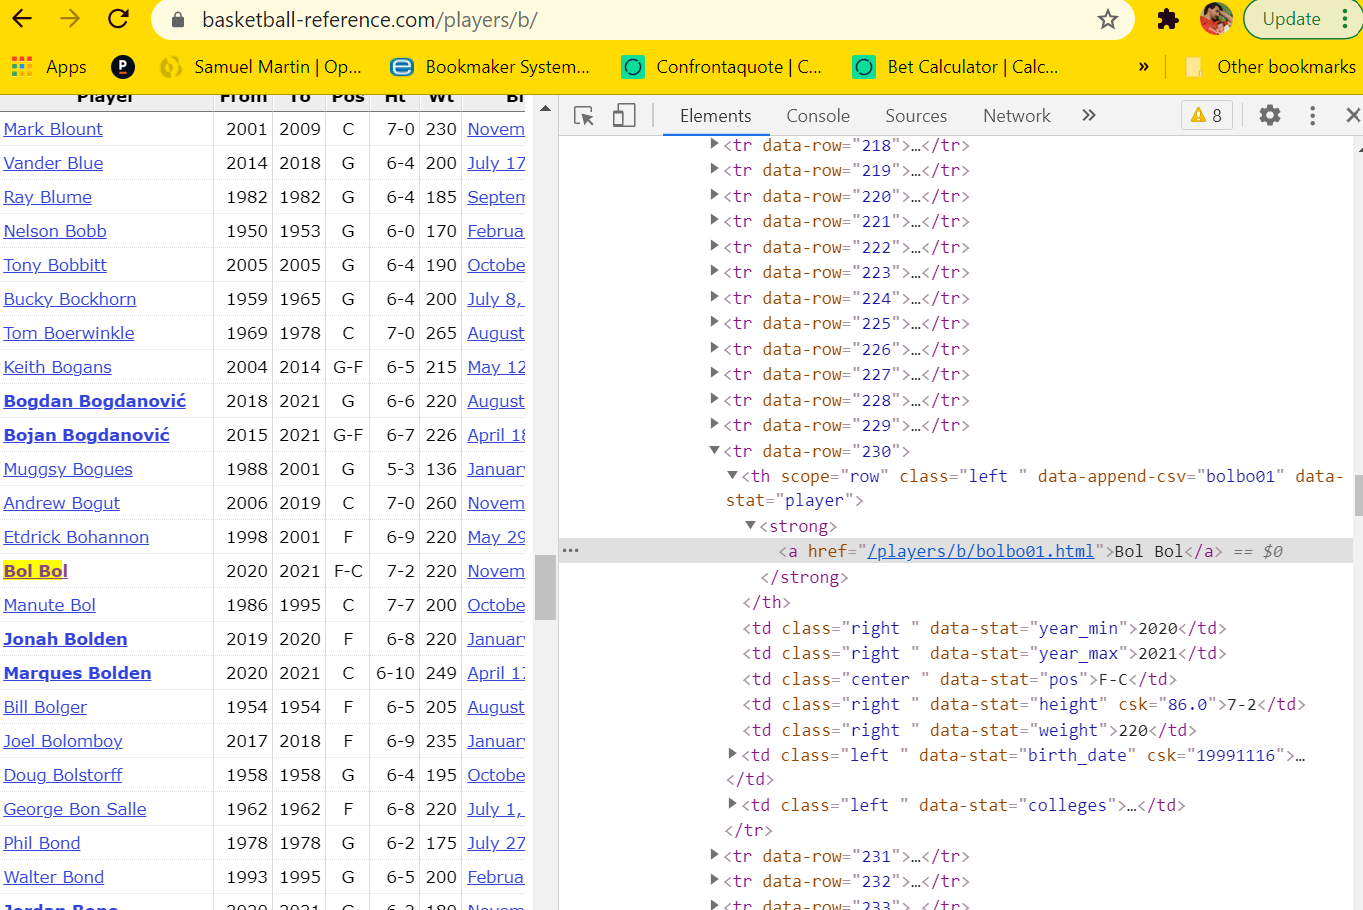

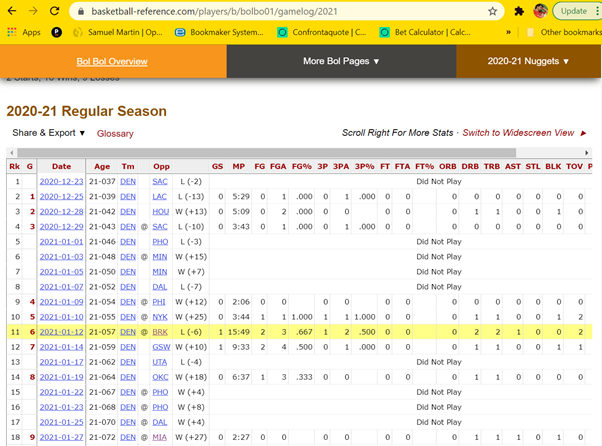

***
#### <center> NLP 2: Topic Classification <center>
***
#### Step 10: Topic Classification
The second feature of the NLP models that were to be explored in this prototype is the ability to categorise comments into topics, the impetus for this would be to isolate when people are discussing things such as injury, coaching decisions, or trades. These are thing that can have significant impact on the results of future games but will often not have any signal in a previous games metrics. 

The corpus was split into a training and test set (20%) before text processing was continued from the prepossessing in NLP1 by lemmatizing and stemming the relevant text. 


In [486]:
#Split DF into train and test sets 
np.random.seed(1234)                                                     # set seed for constancy in testing
train_topic, test_topic = train_test_split(pp_comment, test_size = 0.2)  # split training/test 80/20 

print('Training set is',len(train_topic), 'long')
print('The test set is', len(test_topic), 'long')

Training set is 4927 long
The test set is 1232 long


In [487]:
def process(comment):                                   # set function for further text processing
    output = []
    for tk in gensim.utils.simple_preprocess(comment):
        if len(tk) > 3:                                 # Set minimum word size to 4
            output.append(stemmer.stem(WordNetLemmatizer().lemmatize(tk, pos='v'))) # stem and lemmatize words
    return output

train = train_topic['words']
train_corpus = train.apply(lambda row: process(row))    # apply text processing function to comments
train_corpus.head()                                     # show results for fist 5 rows

326     [anyth, solid, number, last, night, point, lea...
327     [watch, game, last, night, realli, evid, invol...
2737    [piston, roll, roll, dont, play, well, moment,...
417     [list, injuri, report, look, like, back, tomor...
4252    [improv, last, year, pretti, scari, potenti, e...
Name: words, dtype: object

#### Step 11: Create dictionary
A dictionary of terms was created, then the  most and least common words were trimmed from the dictionary 


In [304]:
# Create dictionary from comments
dictionary = gensim.corpora.Dictionary(text_coupus)
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n= 100000)
#Check 
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 accur
1 activ
2 admit
3 aggress
4 alpha
5 appar
6 arexa
7 articl
8 attack
9 ballin
10 barton


#### Step 12: Bag of Words
Bag-of-words model was created for each comment,
Below code tested the output for the for the first document showing the first 10 words frequency


In [484]:
#Preview BOW for a sample preprocessed document
bow_corpus = [dictionary.doc2bow(doc) for doc in train_corpus]
document_num = 0                        
bow_doc_x = bow_corpus[document_num]      # limit to first document
for i in range(10):                       # show occurance of first 10 words
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0],dictionary[bow_doc_x[i][0]],bow_doc_x[i][1]))

Word 0 ("accur") appears 1 time.
Word 1 ("activ") appears 3 time.
Word 2 ("admit") appears 2 time.
Word 3 ("aggress") appears 1 time.
Word 4 ("alpha") appears 1 time.
Word 5 ("appar") appears 2 time.
Word 6 ("arexa") appears 1 time.
Word 7 ("articl") appears 2 time.
Word 8 ("attack") appears 2 time.
Word 9 ("ballin") appears 1 time.


#### Step 13: Latent Dirichlet Allocation
Latent Dirichlet Allocation is an unsupervised learning model that, the hyper parameters of 5 topics, 50 passes were chosen. The number of topics is arbitrary and could have been altered depending on what was wanting to be achieved. Here 5 was set as balance between allowing multiple potential topics that may be discussed and keeping it narrow to isolate topics such as injury or team news. Passes was a balance between fitting and CPU time, workers was the number of CPU processors the machine had.

The results are printed below of with the most important words for each topic. The initial results show promise as Topic 3 has kawhi, beal and lillard along with knee as key words. This is referencing the players Kawhi Leonard, Bradley Beal and Damian Lillard who have all had knee injuries in the last season.

In [308]:
lda_model =  gensim.models.LdaMulticore(bow_corpus,  # Run LDA model with set parameters
                                   num_topics = 5, 
                                   id2word = dictionary,                                    
                                   passes = 50,
                                   workers = 2)

for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.006*"gianni" + 0.006*"laker" + 0.005*"ariza" + 0.005*"booker" + 0.005*"allen" + 0.005*"johnson" + 0.005*"jackson" + 0.005*"ingram" + 0.004*"sun" + 0.004*"ayton"


Topic: 1 
Words: 0.011*"rubio" + 0.011*"lowri" + 0.010*"wiggin" + 0.009*"parker" + 0.009*"embiid" + 0.008*"spur" + 0.007*"conley" + 0.006*"derozan" + 0.005*"simmon" + 0.005*"collin"


Topic: 2 
Words: 0.012*"westbrook" + 0.011*"favor" + 0.009*"ibaka" + 0.008*"cousin" + 0.008*"drummond" + 0.007*"melo" + 0.006*"kanter" + 0.006*"teagu" + 0.005*"durant" + 0.005*"millsap"


Topic: 3 
Words: 0.014*"kawhi" + 0.011*"whitesid" + 0.011*"wall" + 0.009*"beal" + 0.009*"lopez" + 0.009*"kyri" + 0.008*"lillard" + 0.007*"batum" + 0.007*"rondo" + 0.007*"kemba"


Topic: 4 
Words: 0.009*"gordon" + 0.007*"harri" + 0.005*"smart" + 0.005*"knee" + 0.005*"hayward" + 0.005*"ankl" + 0.004*"burk" + 0.004*"stash" + 0.004*"gallo" + 0.004*"updat"




#### Step 14: Coherence Model
A coherence model was run on the above lda_model with the training tokenized text and dictionary as parameter, result was approximately 30%, this has clear room for improvement with a production version but is take here as part of a prototype proof of concept. In a future iteration much like with the sentiment model a dictionary of terms will be reviewed that is specific to basketball and gambling.


In [312]:
# Coherence Model 
coherence_model = CoherenceModel(model=lda_model, texts=train_corpus, dictionary=dictionary, coherence='c_v' )
coherence_lda = coherence_model.get_coherence()

print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.31609432810289906


#### Step 15: Test Set
The comments for the test corpus were processed as per the training set and the comments for the training set were run against the LDA model that was trained on the training set, results were passed into a dataframe for analysis. 
As is shown in the results below, 60% of comments could be identified to a single topic with probability of over 50%, however as visualised in the line graph below the probability of identifying a topic can be described by a sigmoid function and quickly loses predictive confidence in assigning topic with  more than 60% probability. 


In [467]:
test = test_topic['words']
test_corpus = test.apply(lambda row: process(row))
test_fit = []
for text in test_corpus:
    test_bow_vector = dictionary.doc2bow(text)
    t0 = 0
    t1 = 0
    t2 = 0
    t3 = 0
    t4 = 0
    for index, score in sorted(lda_model[test_bow_vector], key=lambda tup: -1*tup[1]):
        if index == 0: 
            t0 = score
        elif index == 1: 
            t1 = score
        elif index == 2: 
            t2 = score
        elif index == 3: 
            t3 = score
        elif index == 4: 
            t4 = score
    test_fit.append([t0,t1,t2,t3,t4])

test_df = pd.DataFrame(data = test_fit, columns=['topic0', 'topic1', 'topic2', 'topic3', 'topic4'])
test_df

,topic0,topic1,topic2,topic3,topic4
0,0.363000,0.000000,0.199253,0.000000,0.434996
1,0.441801,0.000000,0.000000,0.374925,0.180578
2,0.672951,0.000000,0.014845,0.097958,0.212079
3,0.578928,0.393221,0.000000,0.022316,0.000000
4,0.049606,0.054546,0.608070,0.286667,0.000000
...,...,...,...,...,...
1227,0.000000,0.000000,0.000000,0.000000,0.992652
1228,0.112215,0.083669,0.249241,0.000000,0.552950
1229,0.072065,0.076865,0.453122,0.198295,0.199653
1230,0.000000,0.207288,0.000000,0.135760,0.653521


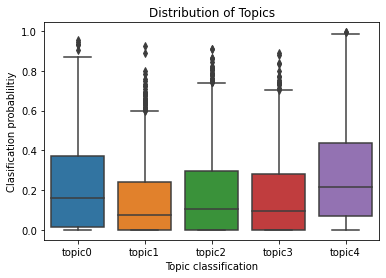

In [477]:
sns.boxplot(x='variable', y= 'value', data=pd.melt(test_df))

plt.xlabel('Topic classification')
plt.ylabel('Clasification probabliltiy')
plt.title('Distribution of Topics')
plt.show()

60% of comments have one topic >50% probability


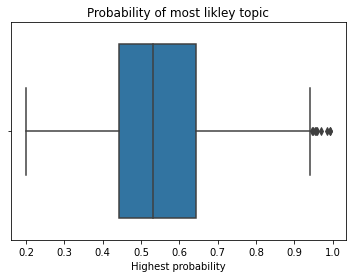

In [508]:
edit = test_df
comment_count = len(test_df)
test_df['max'] = test_df.max(axis = 1)
strong_topic = test_df[test_df['max']>=0.5]
strg_comment_count = len(strong_topic)
strg_rate = '{:.00%}'.format(strg_comment_count/comment_count)
print(strg_rate, 'of comments have a 50% probabiliy of being assigned to a topic')
sns.boxplot(test_df['max'])

plt.xlabel('Highest probability')
plt.title('Probability of most likley topic')
plt.show()

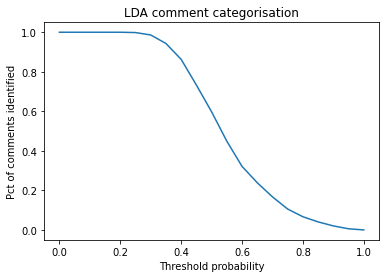

In [562]:
x = np.linspace(0,1,21)
thresh = [] #blank for threshold values
for n in x: 
    q = (len(test_df[test_df['max']>=n])/comment_count)
    thresh.append([n,q])
thresh_df = pd.DataFrame(thresh, columns =['Threshold probability', 'Pct of comments'])

x = list(thresh_df['Threshold probability'])
y = list(thresh_df['Pct of comments'])
plt.plot(x,y)
plt.xlabel('Threshold probability')
plt.ylabel('Pct of comments identified')
plt.title('LDA comment categorisation')
plt.show()

# 

using the trained tokens for player, a prodction model could then connect to other forum sites with unstructred forum titles to predict which players are being discussed and harvest that information to weight player decisions. 
One way to weight the information could be to take the product of the probabily that a particular player was being discussed and the magnatude of the sentiment.